In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# utilizado para manejos de directorios y rutas
import os
#utilizado para importar y ordenar los datos del DATASET
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Modulo de optimizacion en scipy
from scipy import optimize

from sklearn.model_selection import train_test_split

# Librerias para graficar
from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

### **Descripcion del Dataset**

Es un conjunto de datos de "Customer Churn" o "Desercion de Clientes" en un banco. Con el objetivo de predecir si un cliente abandonará o no el banco (churn)

#### **Variables**
1. **customer_id:** Identificador único para cada cliente. (No necesaria de usar)
2. **credit_score:** Puntaje de crédito del cliente.
3. **country:** País de residencia del cliente.
4. **gender:** Género del cliente (Male/Female).
5. **age:** Edad del cliente.
6. **tenure:** Número de años que el cliente ha estado con el banco.
7. **balance:** Saldo de la cuenta del cliente.
8. **products_number:** Número de productos bancarios que posee el cliente.
9. **credit_card:** Indica si el cliente tiene una tarjeta de crédito (1) o no (0).
10.**active_member:** Indica si el cliente es un miembro activo (1) o no (0).
11. **estimated_salary:** Salario estimado del cliente.
12. **churn:** Variable objetivo (1 indica que el cliente abandonó el banco, 0 indica que no lo hizo).

In [62]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Bank Customer Churn Prediction.csv')
dataframe.sample(n=200)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5755,15600813,717,France,Male,50,9,90305.76,1,1,1,124626.57,0
2787,15700487,805,France,Male,46,6,118022.06,3,1,0,162643.15,1
5704,15661626,732,Germany,Female,45,6,98792.40,1,1,0,81491.70,1
3693,15722246,742,France,Female,60,4,0.00,1,1,1,13161.66,1
6207,15665811,644,France,Male,33,9,141234.98,1,1,0,95673.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,15775880,554,France,Female,30,9,0.00,2,1,1,40320.30,0
690,15589493,716,Germany,Male,27,1,122552.34,2,1,0,67611.36,0
7920,15684296,714,France,Male,34,5,141173.03,1,0,1,98896.06,0
6364,15663421,527,Spain,Male,28,6,128396.33,2,1,0,79919.97,0


In [63]:
Country_Var = dataframe['country'].unique() #Obtenemos todos los valores unicos de la columna 'country'

#Mostramos la lista de valores unicos y la cantidad de estos
print(Country_Var)
print(len(Country_Var))

['France' 'Spain' 'Germany']
3


In [64]:
#Se asigna valores numericos a cada uno de los paises
bank_dataset_map = {
    'France': 1,
    'Spain': 2,
    'Germany': 3
}
# Se aplica el mapeo a la columna 'country' y se crea una nueva columna 'country_ordinal' con los valores numericos respectivos
dataframe['country_ordinal'] = dataframe['country'].map(bank_dataset_map)

#Quitamos la columna 'country'
dataframe.drop('country', axis=1, inplace=True)

#verificamos
dataframe.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_ordinal
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [65]:
Gender_Var = dataframe['gender'].unique() #Obtenemos todos los valores unicos de la columna 'gender'

#Mostramos la lista de valores unicos y la cantidad de estos
print(Gender_Var)
print(len(Gender_Var))

['Female' 'Male']
2


In [66]:
#Se asigna valores numericos a cada uno de los géneros
bank_dataset_map = {
    'Female': 1,
    'Male': 2,
}
# Se aplica el mapeo a la columna 'airline' y se crea una nueva columna 'airline_ordinal' con los valores numericos respectivos
dataframe['gender_ordinal'] = dataframe['gender'].map(bank_dataset_map)

#Quitamos la columna 'airline'
dataframe.drop('gender', axis=1, inplace=True)

#verificamos
dataframe.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_ordinal,gender_ordinal
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2,1


In [67]:
print(dataframe.isnull().sum())

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_ordinal     0
gender_ordinal      0
dtype: int64


In [68]:
median_balance = dataframe['balance'].median()
dataframe['balance'] = dataframe['balance'].replace(0, median_balance)
dataframe.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_ordinal,gender_ordinal
0,15634602,619,42,2,97198.54,1,1,1,101348.88,1,1,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,39,1,97198.54,2,0,0,93826.63,0,1,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2,1


In [69]:
dataframe.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_ordinal,gender_ordinal
0,15634602,619,42,2,97198.54,1,1,1,101348.88,1,1,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,2,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,39,1,97198.54,2,0,0,93826.63,0,1,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,2,1


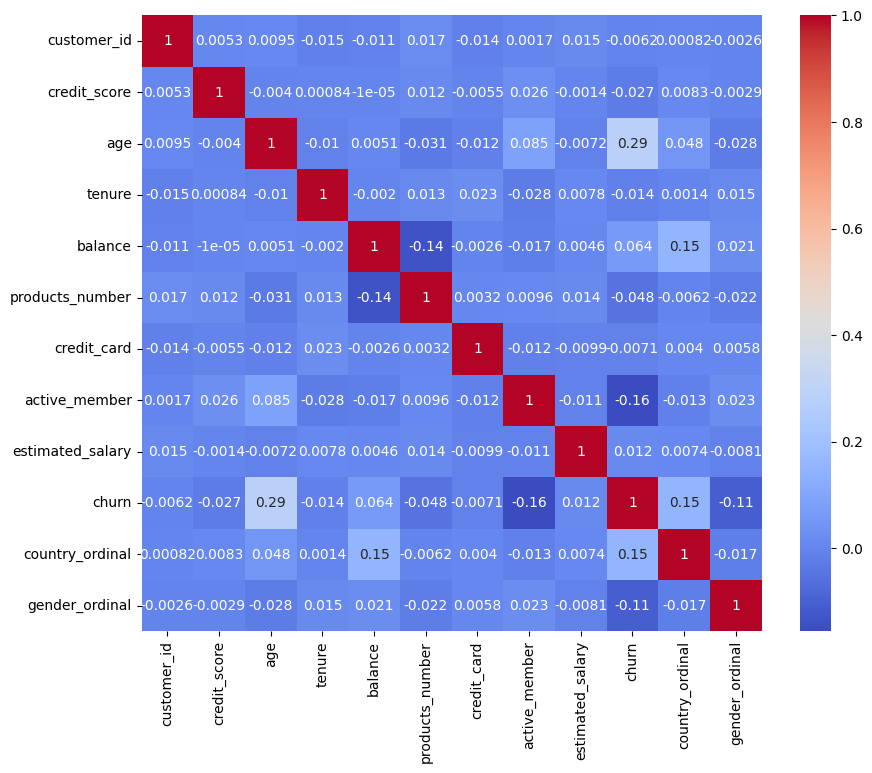

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [71]:
dataframe.drop('customer_id', axis=1, inplace=True)
dataframe.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_ordinal,gender_ordinal
0,619,42,2,97198.54,1,1,1,101348.88,1,1,1
1,608,41,1,83807.86,1,0,1,112542.58,0,2,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,699,39,1,97198.54,2,0,0,93826.63,0,1,1
4,850,43,2,125510.82,1,1,1,79084.10,0,2,1


In [72]:
# Seleccionar las columnas de edad (2) y balance (4)
X = dataframe.iloc[:, [1, 3]].values  # Selección de las columnas y conversión a array numpy
print("Valores de X (edad y balance):")
print(X)

y = dataframe.iloc[:, -3].values
print("Valores de y (churn):")
print(y)

Valores de X (edad y balance):
[[4.2000000e+01 9.7198540e+04]
 [4.1000000e+01 8.3807860e+04]
 [4.2000000e+01 1.5966080e+05]
 ...
 [3.6000000e+01 9.7198540e+04]
 [4.2000000e+01 7.5075310e+04]
 [2.8000000e+01 1.3014279e+05]]
Valores de y (churn):
[1 0 1 ... 1 1 0]


In [73]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### **Para el modelo en sklearn**

In [74]:
# Seleccionar las columnas de edad (1) y balance (3)
dataframe_sk = dataframe.iloc[:, [1, 3]].copy()

# Agregar la columna 'churn' usando loc para evitar el SettingWithCopyWarning
dataframe_sk['churn'] = dataframe.loc[:, 'churn']

# Mostrar las primeras filas para verificar
dataframe_sk.head()


,age,balance,churn
0,42,97198.54,1
1,41,83807.86,0
2,42,159660.80,1
3,39,97198.54,0
4,43,125510.82,0


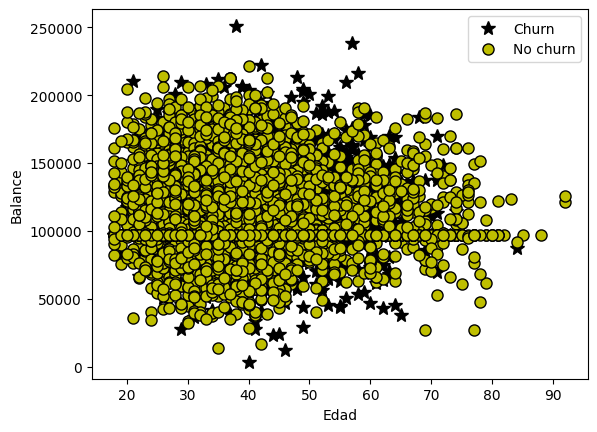

In [75]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Edad')
pyplot.ylabel('Balance')
pyplot.legend(['Churn', 'No churn'])
pass

In [76]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [77]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [78]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

print(X_train)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.9000000e+01 1.1314698e+05]
 [2.9000000e+01 1.0576728e+05]
 [4.7000000e+01 1.3002487e+05]
 ...
 [4.5000000e+01 9.7198540e+04]
 [3.9000000e+01 9.7198540e+04]
 [4.2000000e+01 1.0016075e+05]]
Media calculada: [3.88872500e+01 1.11625015e+05]
Desviación estandar calculada: [1.04682395e+01 2.63441736e+04]
[[-0.94449979  0.05777235]
 [-0.94449979 -0.2223541 ]
 [ 0.77498705  0.69844115]
 ...
 [ 0.58393295 -0.5476154 ]
 [ 0.01077067 -0.5476154 ]
 [ 0.29735181 -0.4351727 ]]


In [79]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_norm.shape
# Agraga el termino de intercepción a A
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X_norm[:])

[[ 1.         -0.94449979  0.05777235]
 [ 1.         -0.94449979 -0.2223541 ]
 [ 1.          0.77498705  0.69844115]
 ...
 [ 1.          0.58393295 -0.5476154 ]
 [ 1.          0.01077067 -0.5476154 ]
 [ 1.          0.29735181 -0.4351727 ]]


In [80]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    # Clipping para evitar log(0)
    h = np.clip(h, 1e-10, 1 - 1e-10)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [81]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]  # número de ejemplos de entrenamiento

    # Asegúrate de que y es un vector unidimensional
    y = y.flatten()

    # Realiza una copia de theta, el cual será actualizado por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history


In [82]:
print(f"Dimensiones de X_norm: {X_norm.shape}")
print(f"Dimensiones de y: {y.shape}")


Dimensiones de X_norm: (8000, 3)
Dimensiones de y: (10000,)


theta calculado por el descenso por el gradiente: [-1.4864756   0.64372673  0.15369278]


0.46642658198257636

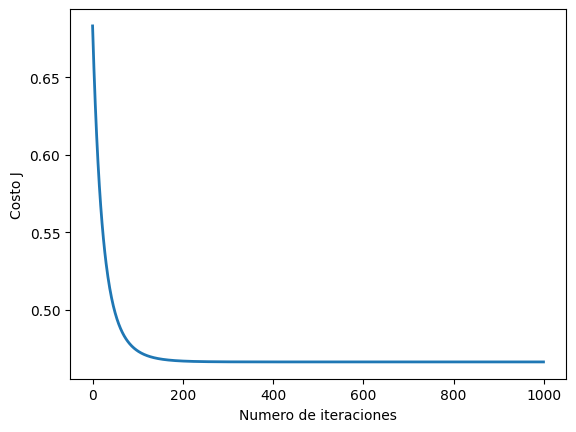

In [83]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.1
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = descensoGradiente(theta, X_norm, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
calcularCosto(theta, X_norm, y_train)




In [84]:
def predict(theta, X):
    """
    Predice si la etiqueta es 0 o 1 usando el modelo aprendido, es decir,
    predice el valor de la variable objetivo basado en los valores de las características.

    Parámetros:
    theta : array, coeficientes del modelo de regresión logística
    X     : array, conjunto de datos para predecir

    Devuelve:
    p     : array, predicciones (0 o 1)
    """
    m = X.shape[0]  # número de ejemplos de entrenamiento

    # Calcula la probabilidad de que y=1 usando la función sigmoide
    p = np.round(sigmoid(X.dot(theta.T)))
    return p


In [85]:
# Normalizar X_test usando la misma mu y sigma que en el entrenamiento
X_test_norm = (X_test - mu) / sigma
m_test = X_test_norm.shape[0]
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Generar predicciones utilizando el theta entrenado
predicciones = predict(theta, X_test_norm)

# Imprimir las predicciones junto con los valores reales
for i, (prediccion, real) in enumerate(zip(predicciones, y_test)):
    print(f'Predicción {i+1}: {prediccion:.0f} - Valor Real: {real:.0f}')


Predicción 1: 0 - Valor Real: 0
Predicción 2: 0 - Valor Real: 0
Predicción 3: 0 - Valor Real: 0
Predicción 4: 0 - Valor Real: 0
Predicción 5: 0 - Valor Real: 0
Predicción 6: 0 - Valor Real: 0
Predicción 7: 0 - Valor Real: 0
Predicción 8: 0 - Valor Real: 0
Predicción 9: 1 - Valor Real: 0
Predicción 10: 0 - Valor Real: 0
Predicción 11: 0 - Valor Real: 0
Predicción 12: 0 - Valor Real: 1
Predicción 13: 0 - Valor Real: 0
Predicción 14: 0 - Valor Real: 0
Predicción 15: 0 - Valor Real: 0
Predicción 16: 0 - Valor Real: 0
Predicción 17: 0 - Valor Real: 0
Predicción 18: 0 - Valor Real: 0
Predicción 19: 0 - Valor Real: 0
Predicción 20: 1 - Valor Real: 0
Predicción 21: 0 - Valor Real: 0
Predicción 22: 0 - Valor Real: 0
Predicción 23: 0 - Valor Real: 0
Predicción 24: 0 - Valor Real: 0
Predicción 25: 0 - Valor Real: 0
Predicción 26: 0 - Valor Real: 0
Predicción 27: 0 - Valor Real: 1
Predicción 28: 0 - Valor Real: 1
Predicción 29: 0 - Valor Real: 0
Predicción 30: 0 - Valor Real: 0
Predicción 31: 0 - 

In [86]:
# verificar si se quedó o no en el banco
X_array = [42, 159660]
X_array = np.array(X_array)
X_array = (X_array - mu) / sigma
X_array = np.concatenate([np.ones((1, 1)), X_array.reshape(1, -1)], axis=1)
# Calcular la probabilidad de que el cliente haya abandonado el banco
probabilidad = sigmoid(np.dot(X_array, theta.T))
print("Probabilidad:", probabilidad)
# Interpretar la probabilidad
if probabilidad >= 0.5:
    print("El cliente probablemente abandonó el banco.")
else:
    print("El cliente probablemente se quedó en el banco.")


Probabilidad: [0.26603673]
El cliente probablemente se quedó en el banco.


In [87]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplos de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [88]:
# Compute accuracy on our training set
p = predict(theta, X_norm)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))

Precisión de entrenamiento: 77.66 %


# **Por SKLEARN**



1. Importar librerias

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. **Preparar datos**: divido el dataset en caracteristicas y variable objetivo o target

In [90]:
X = dataframe_sk.drop(columns=['churn'])
y = dataframe_sk['churn']

In [91]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. **Normalizo los datos**

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. **Entreno el modelo de regresion logistica**

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

5. **Hago predicciones**

In [94]:
y_pred = model.predict(X_test)

6. **Evaluo el modelo generando una matriz de confusion**

In [95]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print("Matriz de confusión:\n", cm)
print("Reporte de clasificación:\n", report)

Precisión del modelo: 0.7855
Matriz de confusión:
 [[1551   56]
 [ 373   20]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.26      0.05      0.09       393

    accuracy                           0.79      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000

